In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

score = pd.read_csv(f'./models/maskFrance/Z64/yrs100/k.9.1fw2.1.2.lrs8skip2/score500.csv', index_col=1) 
score

,fold,C,TP,TN,FP,FN,MCC,entropy,skill,Brier,freq
0,0,1.000000e-03,0.0,735.0,0.0,35.0,0.000000,0.300191,-0.512180,0.072809,0.000000
1,0,1.000000e-02,0.0,735.0,0.0,35.0,0.000000,0.162647,0.180681,0.038665,0.000000
2,0,5.000000e-02,2.0,733.0,2.0,33.0,0.157691,0.145505,0.267035,0.035465,0.005195
3,0,1.000000e-01,5.0,733.0,2.0,30.0,0.307550,0.145585,0.266630,0.035158,0.009091
4,0,5.000000e-01,7.0,732.0,3.0,28.0,0.360451,0.148701,0.250932,0.035135,0.012987
...,...,...,...,...,...,...,...,...,...,...,...
7,9,1.000000e+02,0.0,709.0,10.0,51.0,-0.030550,0.246785,-0.243154,0.066885,0.012987
8,9,1.000000e+03,0.0,709.0,10.0,51.0,-0.030550,0.246818,-0.243319,0.066890,0.012987
9,9,1.000000e+05,0.0,709.0,10.0,51.0,-0.030550,0.246821,-0.243337,0.066891,0.012987
10,9,1.000000e+07,0.0,709.0,10.0,51.0,-0.030550,0.246821,-0.243337,0.066891,0.012987


In [14]:
score.groupby('C').mean().loc[0.1,'skill'], score.groupby('C').std().loc[0.1,'skill']

(0.16030096501730076, 0.16240549381443564)

In [15]:
def csv_to_score(folder, checkpoints):
    score=[]
    existing_checkpoints = []
    for i in checkpoints:
        if os.path.exists(f'{folder}/score{i}.csv'):
            score.append(pd.read_csv(f'{folder}/score{i}.csv', index_col=1) )
            existing_checkpoints.append(i)
    print(f'{existing_checkpoints = }')
    return pd.concat(score, keys=existing_checkpoints,names=['checkpoint', None])
score = csv_to_score('./models/maskFrance/Z64/yrs100/k.9.1fw2.1.2.lrs8skip2/',range(1,5000,1))
score

existing_checkpoints = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]


fold             C   TP     TN    FP    FN      MCC   entropy  \
checkpoint                                                                     
1          0      0  1.000000e-03  0.0  735.0   0.0  35.0  0.00000  0.316109   
           1      0  1.000000e-02  0.0  735.0   0.0  35.0  0.00000  0.201859   
           2      0  5.000000e-02  0.0  735.0   0.0  35.0  0.00000  0.194607   
           3      0  1.000000e-01  0.0  735.0   0.0  35.0  0.00000  0.194696   
           4      0  5.000000e-01  0.0  735.0   0.0  35.0  0.00000  0.195171   
...             ...           ...  ...    ...   ...   ...      ...       ...   
2000       7      9  1.000000e+02  0.0  707.0  12.0  51.0 -0.03351  0.243968   
           8      9  1.000000e+03  0.0  707.0  12.0  51.0 -0.03351  0.243998   
           9      9  1.000000e+05  0.0  707.0  12.0  51.0 -0.03351  0.244001   
           10     9  1.000000e+07  0.0  707.0  12.0  51.0 -0.03351  0.244001   
           11     9  1.000000e+09  0.0  707.0  12.0  51.0 -0.03351  0.244001   

                  skill     Brier      freq  
checkpoint                                   
1          0  -0.592364  0.077469  0.000000  
           1  -0.016842  0.045841  0.000000  
           2   0.019688  0.044523  0.000000  
           3   0.019238  0.044462  0.000000  
           4   0.016849  0.044440  0.000000  
...                 ...       ...       ...  
2000       7  -0.228962  0.066941  0.015584  
           8  -0.229114  0.066946  0.015584  
           9  -0.229131  0.066946  0.015584  
           10 -0.229131  0.066946  0.015584  
           11 -0.229131  0.066946  0.015584  

[3600 rows x 11 columns]

In [16]:
score.groupby(['checkpoint', 'C']).mean().loc[(slice(None), 0.1), 'skill']  # score.groupby(['checkpoint', 'C']).mean().loc[(10, 0.01), 'skill']  # to select specific

checkpoint  C  
1           0.1   -0.019783
10          0.1    0.151009
20          0.1    0.171461
30          0.1    0.176846
40          0.1    0.184942
50          0.1    0.184187
60          0.1    0.185686
70          0.1    0.185297
80          0.1    0.182477
90          0.1    0.183403
100         0.1    0.179589
200         0.1    0.171984
300         0.1    0.164017
400         0.1    0.158998
500         0.1    0.160301
600         0.1    0.157392
700         0.1    0.158977
800         0.1    0.162591
900         0.1    0.160088
1000        0.1    0.162674
1100        0.1    0.159020
1200        0.1    0.159211
1300        0.1    0.160123
1400        0.1    0.157217
1500        0.1    0.158814
1600        0.1    0.159236
1700        0.1    0.158449
1800        0.1    0.158019
1900        0.1    0.159126
2000        0.1    0.159054
Name: skill, dtype: float64

existing_checkpoints = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900]


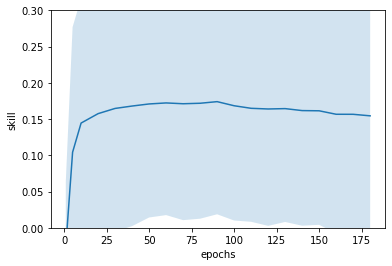

In [17]:
score = csv_to_score('./models/maskFrance/Z64/yrs100/k.9.1fw2.1.2.lrs8/',range(1,5000,1))
meanskillvsckpt = score.groupby(['checkpoint', 'C']).mean().loc[(slice(None), 0.1), 'skill'].droplevel(level=1)
stdskillvsckpt = score.groupby(['checkpoint', 'C']).std().loc[(slice(None), 0.1), 'skill'].droplevel(level=1)
maxiter=20
plt.fill_between(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter]-stdskillvsckpt.values[:maxiter],meanskillvsckpt.values[:maxiter]+stdskillvsckpt.values[:maxiter],alpha=0.2)
plt.plot(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter])
plt.xlabel('epochs')
plt.ylabel('skill')
plt.ylim([0,0.3])
plt.savefig('Images/classification.png')

existing_checkpoints = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000]
existing_checkpoints = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3

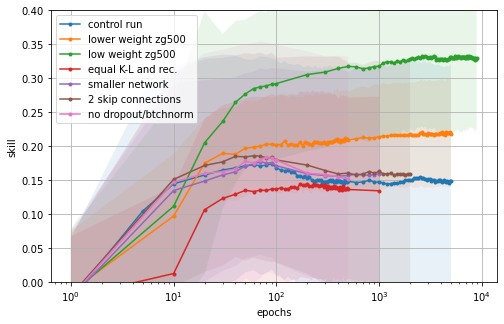

In [18]:
names = ['control run',
        'lower weight zg500',
        'low weight zg500',
        'equal K-L and rec.',
        'smaller network',
        '2 skip connections',
        'no dropout/btchnorm'
        ]
folders = ['./models/maskFrance/Z64/yrs100/k.9.1fw2.1.2.lrs8/',
            './models/maskFrance/Z64/yrs100/k.9.1fw2..01.2.lrs8/',
            './models/maskFrance/Z64/yrs100/k.9.1fw2..1.2.lrs8/',
            './models/maskFrance/Z64/yrs100/k.5.5fw2.1.2.lrs8/',
            './models/maskFrance/Z64/yrs100/k.9.1fw2.1.2/',
            './models/maskFrance/Z64/yrs100/k.9.1fw2.1.2.lrs8skip2/',
            './models/maskFrance/Z64/yrs100/k.9.1fw2.1.2.lrs8nodrpbnrml/'
            ]
plt.figure(figsize=(8,5))
for name, folder in zip(names, folders):
    score = csv_to_score(folder,range(1,9000,1))
    meanskillvsckpt = score.groupby(['checkpoint', 'C']).mean().loc[(slice(None), 0.1), 'skill'].droplevel(level=1)
    stdskillvsckpt = score.groupby(['checkpoint', 'C']).std().loc[(slice(None), 0.1), 'skill'].droplevel(level=1)
    maxiter=100
    plt.fill_between(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter]-stdskillvsckpt.values[:maxiter],meanskillvsckpt.values[:maxiter]+stdskillvsckpt.values[:maxiter],alpha=0.1)
    plt.plot(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter],label=name, marker='.')
plt.xlabel('epochs')
plt.ylabel('skill')
plt.ylim([0,0.4])
plt.xscale("log")
plt.legend(loc='best')
plt.grid(True)
plt.savefig('Images/classification.png')

In [49]:
score = pd.read_csv(f'./models/maskFrance/Z64/yrs100/k.99.01fw2.1.2.lrs8/score.csv') 
score

,fold,checkpoint,Unnamed: 2,C,TP,TN,FP,FN,MCC,entropy,skill,Brier,freq
0,0,1,0,1.000000e-03,0.0,729.0,6.0,35.0,-0.019338,0.214433,-0.080182,0.055089,0.007792
1,0,1,1,1.000000e-02,0.0,735.0,0.0,35.0,0.000000,0.171883,0.134157,0.043264,0.000000
2,0,1,2,5.000000e-02,0.0,735.0,0.0,35.0,0.000000,0.168429,0.151555,0.041745,0.000000
3,0,1,3,1.000000e-01,0.0,735.0,0.0,35.0,0.000000,0.169329,0.147022,0.041613,0.000000
4,0,1,4,5.000000e-01,0.0,735.0,0.0,35.0,0.000000,0.171309,0.137049,0.041555,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,9,400,7,1.000000e+02,2.0,706.0,13.0,49.0,0.038031,0.242578,-0.221962,0.064526,0.019481
1676,9,400,8,1.000000e+03,2.0,706.0,13.0,49.0,0.038031,0.242552,-0.221829,0.064512,0.019481
1677,9,400,9,1.000000e+05,2.0,706.0,13.0,49.0,0.038031,0.242549,-0.221815,0.064510,0.019481
1678,9,400,10,1.000000e+07,2.0,706.0,13.0,49.0,0.038031,0.242549,-0.221814,0.064510,0.019481


In [59]:
np.mean(score.loc[(score['checkpoint'] == 70) & (score['C'] == 1e-1)]['MCC'])

0.17438625231268273

In [54]:
score.groupby(['checkpoint', 'C']).mean().loc[(slice(None), 0.1), 'MCC']

checkpoint  C  
1           0.1    0.011864
10          0.1    0.152380
20          0.1    0.139251
30          0.1    0.168615
40          0.1    0.165328
50          0.1    0.158058
60          0.1    0.164611
70          0.1    0.174386
80          0.1    0.169877
90          0.1    0.171683
100         0.1    0.183301
200         0.1    0.158872
300         0.1    0.152882
400         0.1    0.156159
Name: MCC, dtype: float64

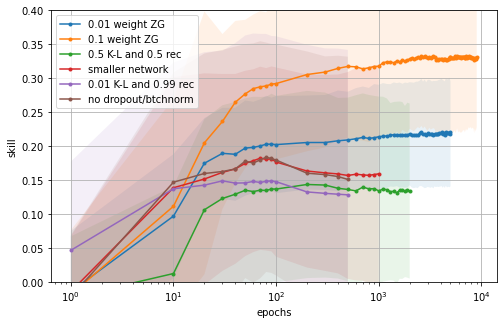

In [72]:
names = ['0.01 weight ZG',
        '0.1 weight ZG',
        '0.5 K-L and 0.5 rec',
        'smaller network',
        '0.01 K-L and 0.99 rec',
        'no dropout/btchnorm'
        ]
folders = ['./models/maskFrance/Z64/yrs100/k.9.1fw2..01.2.lrs8/',
            './models/maskFrance/Z64/yrs100/k.9.1fw2..1.2.lrs8/',
            './models/maskFrance/Z64/yrs100/k.5.5fw2.1.2.lrs8/',
            './models/maskFrance/Z64/yrs100/k.9.1fw2.1.2/',
            './models/maskFrance/Z64/yrs100/k.99.01fw2.1.2.lrs8/',
            './models/maskFrance/Z64/yrs100/k.9.1fw2.1.2.lrs8nodrpbnrml/'
            ]
plt.figure(figsize=(8,5))
for name, folder in zip(names, folders):
    score = pd.read_csv(f'{folder}score.csv') 
    meanskillvsckpt = score.groupby(['checkpoint', 'C']).mean().loc[(slice(None), 0.1), 'skill'].droplevel(level=1)
    stdskillvsckpt = score.groupby(['checkpoint', 'C']).std().loc[(slice(None), 0.1), 'skill'].droplevel(level=1)
    maxiter=100
    plt.fill_between(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter]-stdskillvsckpt.values[:maxiter],meanskillvsckpt.values[:maxiter]+stdskillvsckpt.values[:maxiter],alpha=0.1)
    plt.plot(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter],label=name, marker='.')
plt.xlabel('epochs')
plt.ylabel('skill')
plt.ylim([0,0.4])
plt.xscale("log")
plt.legend(loc='best')
plt.grid(True)
#plt.savefig('Images/classification.png')